# Omkar Jathar
# omchinmay.jathar@gmail.com

## Objective and Synopsis
### The primary objective of this project is to develop an accurate and robust deep learning model that can predict the future stock prices of any stock/commodity/crypto based on historical stock data. The model will assist investors, traders, and financial analysts in making informed decisions regarding buying, selling, or holding stocks.

## Dimensions we will explore -
### Specifically, the project aims to address the following key questions:
    1. Can we accurately predict the future prices using deep learning techniques?
    2. How does the performance of the deep learning model compare to traditional forecasting methods?
    3. What are the most influential factors driving the stock prices, and how effectively does the model capture them?
    4. How can the developed model be deployed and integrated into existing trading systems or investment platforms


### In this project, we aim to develop a deep learning model to predict the stock prices of ANY stock based on historical stock data.

# LSTM Model (Long Short Term Memory)

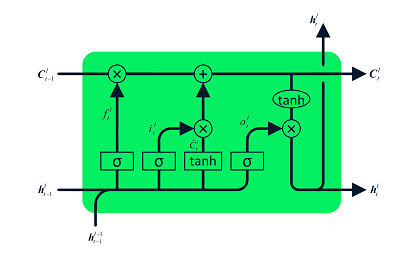

# GRU Model (Gated Recurrent Unit)

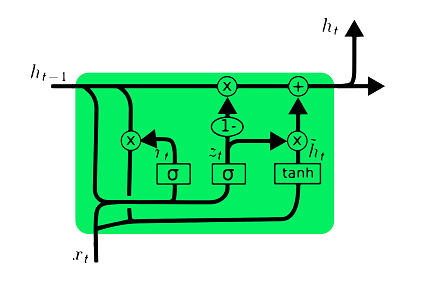

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)
import warnings
warnings.filterwarnings("ignore")

## Enter the Symbol Name of whichever stock you want to predict movement for in the cell below - 

In [2]:
symbols_list = 'KOTAKBANK.NS'  # Stock symbol for the desired company on Yahoo Finance

In [3]:
import yfinance as yf



end_date = '2024-02-14'

start_date = pd.to_datetime(end_date) - pd.DateOffset(365 * 18)

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date)

df.index.names = ['date']
df.columns = df.columns.str.lower()


# df = pd.read_csv (r"C:\Users\nages\Downloads\Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"])
print(df.head())
df.describe()

[*********************100%%**********************]  1 of 1 completed

                 open       high        low      close  adj close  volume
date                                                                     
2006-02-20  58.275002  58.737499  56.950001  57.825001  56.886715  371664
2006-02-21  58.437500  59.500000  57.650002  57.950001  57.009689  289120
2006-02-22  58.500000  58.687500  56.799999  57.325001  56.394840  408192
2006-02-23  57.937500  58.187500  57.500000  57.700001  56.763741  273196
2006-02-24  57.750000  59.500000  57.500000  58.450001  57.501568  547992


,open,high,low,close,adj close,volume
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4.436000e+03
mean,793.174214,802.534026,782.734693,792.815678,790.490064,2.947093e+06
std,645.702505,651.667270,638.904607,645.334905,645.102929,3.533195e+06
min,52.549999,57.500000,52.000000,53.900002,53.025406,0.000000e+00
25%,217.187500,222.000000,213.000000,217.125000,214.940125,1.314090e+06
50%,637.950012,649.887482,630.524994,640.325012,637.392944,2.145860e+06
75%,1344.250000,1365.200012,1330.424988,1343.299988,1340.192108,3.538992e+06
max,2200.000000,2253.000000,2176.600098,2210.949951,2207.801758,8.859813e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4436 entries, 2006-02-20 to 2024-02-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       4436 non-null   float64
 1   high       4436 non-null   float64
 2   low        4436 non-null   float64
 3   close      4436 non-null   float64
 4   adj close  4436 non-null   float64
 5   volume     4436 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.6 KB


# PreProcessing and Visualisation

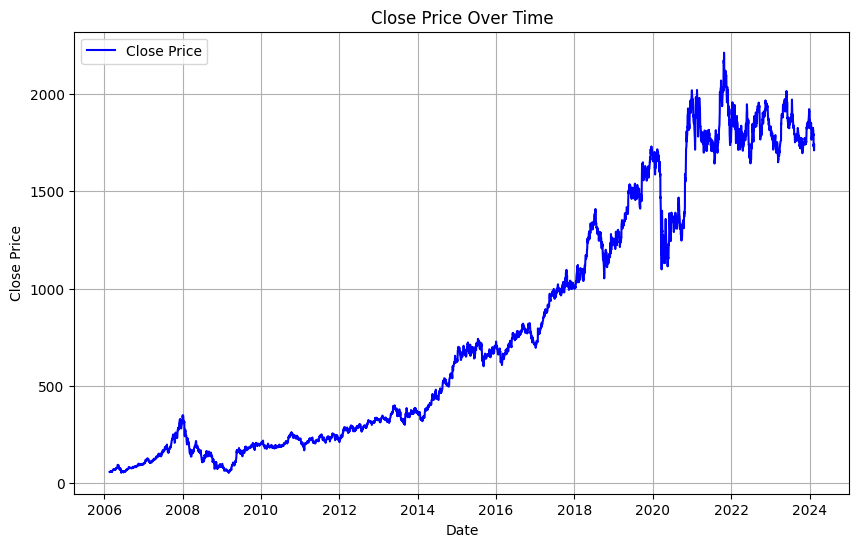

In [5]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Assuming 'Date' is the first level of the index

# Plotting the 'Close' column
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values(0), df['close'], color='blue', label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


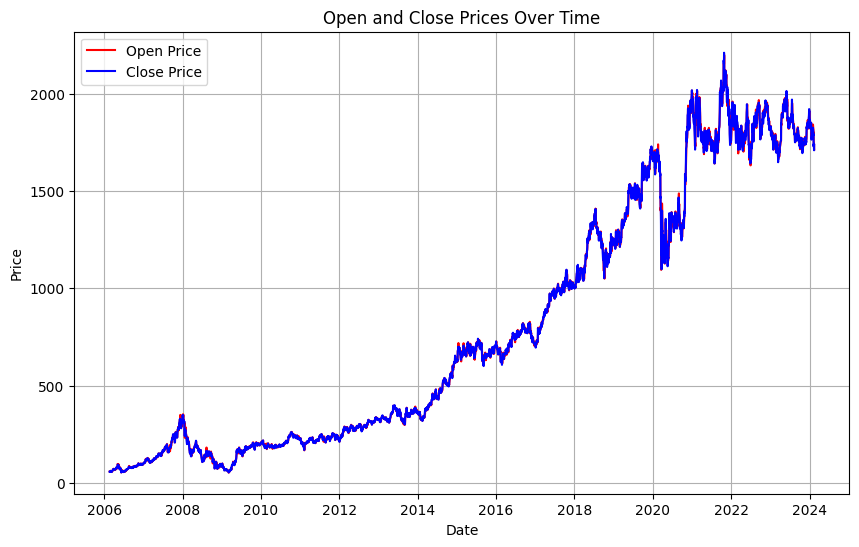

In [6]:
import matplotlib.pyplot as plt

# Plotting 'Open' and 'Close' prices
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values(0), df['open'], color='red', label='Open Price')
plt.plot(df.index.get_level_values(0), df['close'], color='blue', label='Close Price')
plt.title('Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


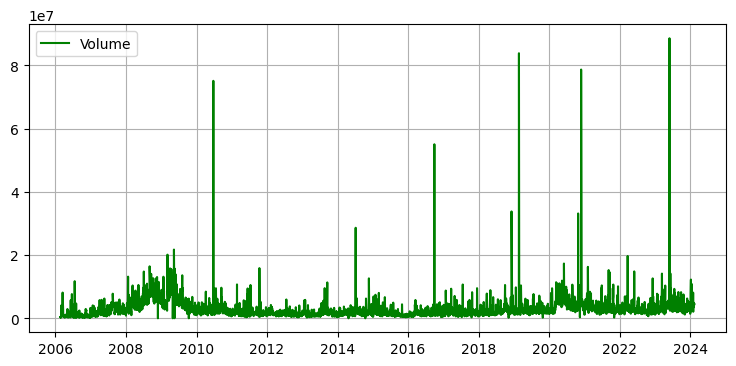

In [7]:
plt.figure(figsize=(9,4))
plt.plot(df.index.get_level_values(0), df['volume'], color='green', label = 'Volume')
plt.legend()
plt.grid(True)
plt.show()

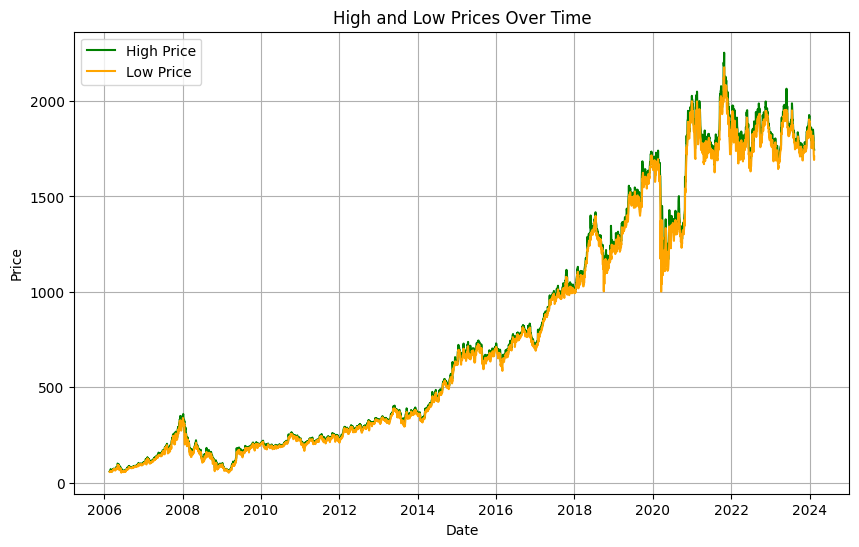

In [8]:
import matplotlib.pyplot as plt

# Plotting 'High' and 'Low' prices
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values(0), df['high'], color='green', label='High Price')
plt.plot(df.index.get_level_values(0), df['low'], color='orange', label='Low Price')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Data Cleaning and Transformation

In [9]:
print(df.describe())

              open         high          low        close    adj close  \
count  4436.000000  4436.000000  4436.000000  4436.000000  4436.000000   
mean    793.174214   802.534026   782.734693   792.815678   790.490064   
std     645.702505   651.667270   638.904607   645.334905   645.102929   
min      52.549999    57.500000    52.000000    53.900002    53.025406   
25%     217.187500   222.000000   213.000000   217.125000   214.940125   
50%     637.950012   649.887482   630.524994   640.325012   637.392944   
75%    1344.250000  1365.200012  1330.424988  1343.299988  1340.192108   
max    2200.000000  2253.000000  2176.600098  2210.949951  2207.801758   

             volume  
count  4.436000e+03  
mean   2.947093e+06  
std    3.533195e+06  
min    0.000000e+00  
25%    1.314090e+06  
50%    2.145860e+06  
75%    3.538992e+06  
max    8.859813e+07  


In [10]:
df.isna().sum()

open         0
high         0
low          0
close        0
adj close    0
volume       0
dtype: int64

## Model Building


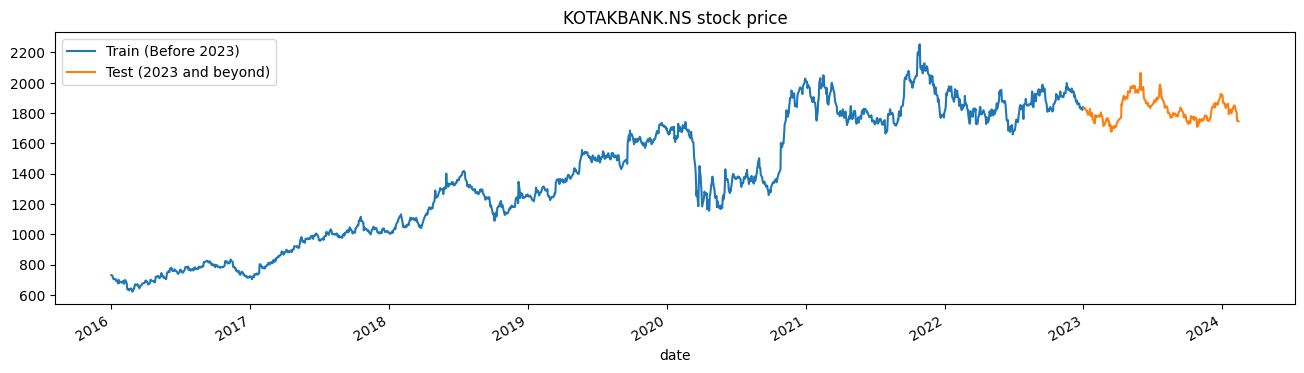

In [11]:
tstart = 2016
tend = 2022

def train_test_plot(df, tstart, tend):
    df.loc[f"{tstart}":f"{tend}", "high"].plot(figsize=(16, 4), legend=True)
    df.loc[f"{tend+1}":, "high"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title(symbols_list + " stock price")
    plt.show()

train_test_plot(df,tstart,tend)

In [12]:
def train_test_split(df, tstart, tend):
    train = df.loc[f"{tstart}":f"{tend}", "high"].values
    test = df.loc[f"{tend+1}":, "high"].values
    return train, test
training_set, test_set = train_test_split(df, tstart, tend)

In [13]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [14]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [15]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [16]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0254
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0022
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0013
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0011
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.6564e-04
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 8.9322e-04
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.3236e-04
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.8098e-04
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3691e-04
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.9859e-04
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.6487e-04
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.3490e-04
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
df_total = df.loc[:,"high"]
inputs = df_total[len(df_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


## Evaluation of the Model

In [19]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(symbols_list + " Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel(symbols_list + " Stock Price")
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

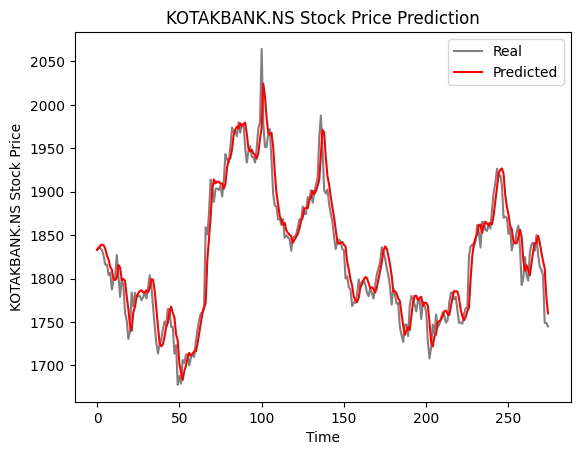

In [20]:
plot_predictions(test_set,predicted_stock_price)

In [21]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 21.28.


# GRU Model (Gated Recurrent Unit)

In [22]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 125)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,126 (187.99 KB)

 Trainable params: 48,126 (187.99 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0315
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.4835e-04
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.3020e-04
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.6500e-04
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.4205e-04
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.1632e-04
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 5.8236e-04


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


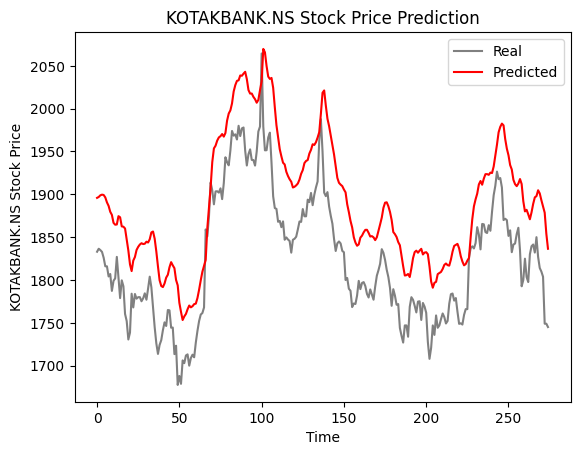

In [24]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [25]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 69.98.


## Here are some business insights derived from these results:

    1) Improved Decision Making: The developed LSTM and GRU models can provide investors, traders, and financial analysts with more accurate predictions of stock prices. This improved forecasting capability enables stakeholders to make more informed decisions regarding buying, selling, or holding Mastercard stocks. By leveraging these models, investors can potentially optimize their investment strategies and maximize returns.

    2) Risk Mitigation: The lower RMSE obtained with the LSTM model suggests that it outperforms the GRU model in terms of prediction accuracy. This insight can guide stakeholders in choosing the most effective model for stock price forecasting. By utilizing the LSTM model, investors can mitigate risks associated with inaccurate predictions and make more reliable investment decisions.

    3) Identifying Trends: The deep learning models not only provide predictions of future stock prices but also capture underlying trends and patterns in stock data. By analyzing the model's predictions and insights, stakeholders can gain a deeper understanding of the market dynamics and identify emerging trends or anomalies that may impact stock prices. This knowledge can be leveraged to anticipate market movements and adjust investment strategies accordingly.
    
    4) Evaluation of Model Performance: The comparison between the LSTM and GRU models highlights the importance of selecting the appropriate architecture for deep learning models in stock price prediction tasks. The superior performance of the LSTM model suggests that it may be better suited for capturing long-term dependencies and complex patterns in the data. This insight informs future model development efforts and underscores the significance of model architecture selection in achieving accurate predictions.

    5) Continuous Improvement: While achieving a lower RMSE with the LSTM model represents a significant milestone, there is always room for improvement. Continuously refining and optimizing the deep learning models can further enhance their predictive accuracy and reliability. Stakeholders should actively monitor model performance, incorporate new data and features, and explore advanced modeling techniques to stay ahead in the dynamic stock market environment.    
    
## Overall, the successful development and deployment of LSTM and GRU models for stock price prediction provide valuable tools for investors, traders, and financial analysts to navigate the complexities of the financial markets and make informed decisions that align with their investment objectives and risk tolerance.